In [1]:
import numpy as np
from STMiner.SPFinder import SPFinder

E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
E:\conda\envs\dev\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was not s

In [2]:
sp = SPFinder()
sp.read_h5ad(file='I://zebrafish/10X_Visium_hunter2021spatially_sample_C_data.h5ad')
#sp.read_h5ad(file='I://Adult.h5ad', bin_size=20)

In [ ]:
import pandas as pd
df = pd.DataFrame(sp.adata.X.todense())
df.index = sp.adata.obs['x'].astype(str)+'x'+sp.adata.obs['y'].astype(str)
df.columns = sp.adata.var.index
df.T.to_csv('count.csv')

In [ ]:
sp.flush_app()
sp.app.run()

In [ ]:
import pandas as pd
spark = pd.read_csv('I://dre_spark_result.csv')

In [ ]:
sorted = spark.sort_values(by='combined_pvalue')

In [ ]:
genes = list(sorted.loc[:,'Unnamed: 0'][:2630].values)

In [ ]:
sp.load_marked_image('')

In [7]:
list(sp.adata.var.index)

['tbk1',
 'crebl2',
 'si:ch211-51e12.7',
 'mrps10',
 'tmem181',
 'rpl18a',
 'rtcb',
 'fbxo7',
 'ost4',
 'tmem214',
 'mapre3b',
 'mtpn',
 'naga',
 'nap1l1',
 'FO704715.1',
 'slc38a4',
 'slc38a2',
 'scaf11',
 'arid2',
 'fgfr1op2',
 'pmpcb',
 'ube2nb',
 'mrpl42',
 'pwp1',
 'cpsf6',
 'yeats4',
 'krr1',
 'aebp2',
 'pik3cg',
 'waslb',
 'lmod2b',
 'cd9b',
 'gnsa',
 'ssbp1',
 'coa6',
 'ndufa5',
 'atp6v1e1b',
 'ccdc167',
 'si:ch211-214j24.10',
 'osgep',
 'apex1',
 'zgc:113263',
 'mrps18a',
 'ccnc',
 'utp20',
 'arl1',
 'MDFIC',
 'ENSDARG00000099281',
 'ifrd1',
 'zgc:101560',
 'tnnt2e',
 'lta4h',
 'phyh',
 'nudt5',
 'cdc123',
 'optn',
 'wnk1b',
 'adipor2',
 'samm50l',
 'nfyba',
 'ipo8',
 'lmf2b',
 'lsm8',
 'hspa14',
 'meig1',
 'tmem243b',
 'mical3b',
 'hsp90b1',
 'sbf1',
 'flncb',
 'ing3',
 'ppfibp1a',
 'sema3aa',
 'gdi2',
 'net1',
 'mkln1',
 'podxl',
 'cyb5r3',
 'cry1aa',
 'si:dkey-222f8.3',
 'mrps33',
 'mkrn1',
 'mgst1.2',
 'b2m',
 'msrb3',
 'lemd3',
 'tmbim4',
 'cand1',
 'dyrk2',
 'tnpo3',
 'p

In [55]:
sp.fit_pattern(n_comp=20, min_cells=200, n_top_genes=500, remove_low_exp_spots=True)

Fitting GMM...: 100%|██████████| 500/500 [01:10<00:00,  7.04it/s]

Number of dropped genes: 1


In [56]:
sp.build_distance_array()


Building distance array...: 100%|██████████| 499/499 [04:42<00:00,  1.76it/s]


In [5]:
import pickle
with open('da.pkl', 'wb') as file:
    pickle.dump(sp.genes_distance_array, file)

In [46]:
import pickle
with open('da.pkl', 'rb') as file:
    sp.genes_distance_array = pickle.load(file)

In [ ]:
sp.plot.plot_cluster_score(mds_comp=20,min_cluster=5,max_cluster=10)

In [66]:
sp.cluster_gene(n_clusters=7, mds_components=20, use_highly_variable_gene=True, n_top_genes=400)

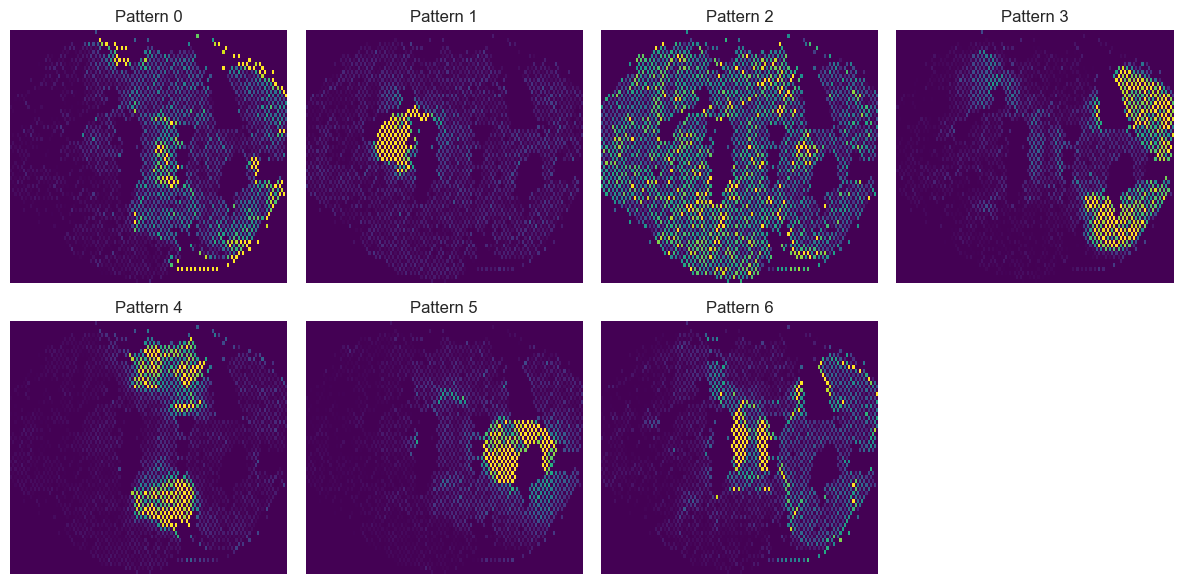

In [67]:
sp.plot.plot_pattern(vmax=99)

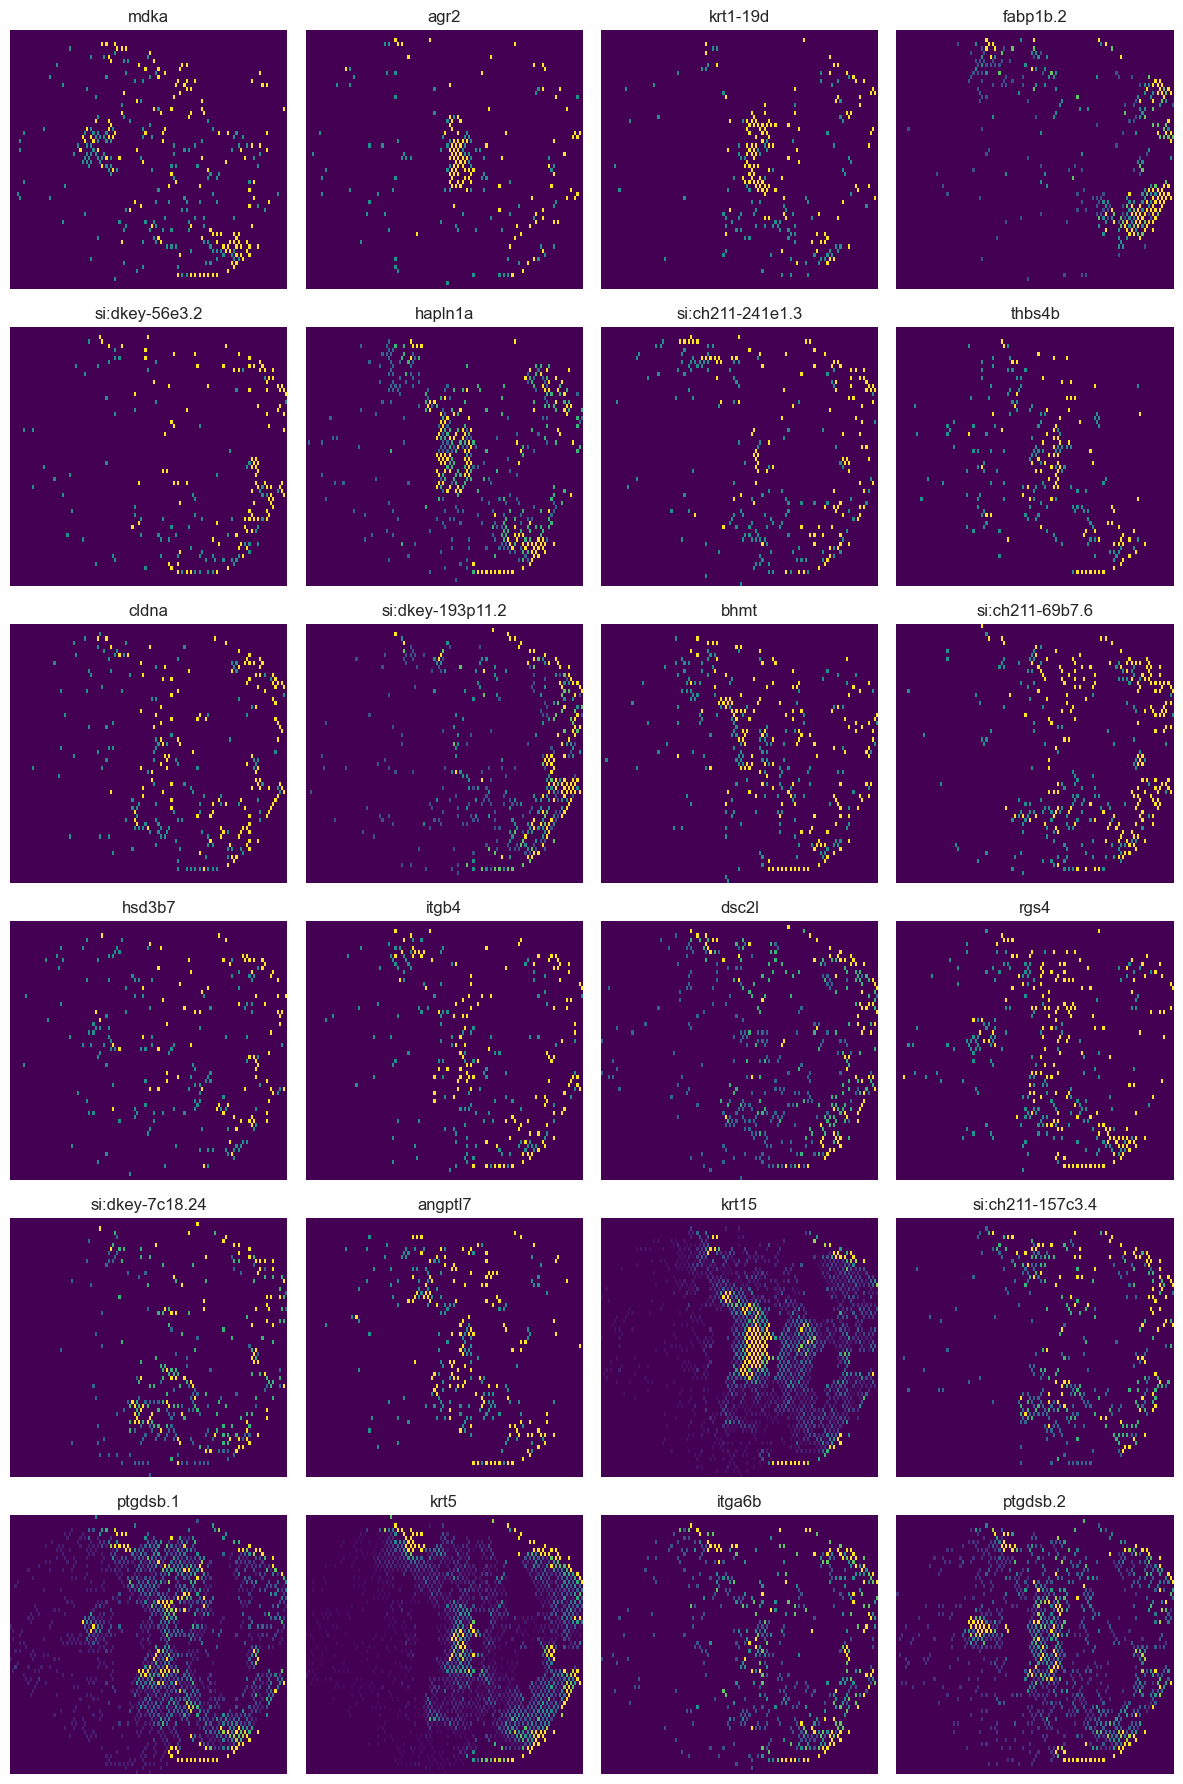

In [69]:
sp.plot.plot_genes(label=0, vmax=99, n_gene=24)

In [18]:
sp.filtered_distance_array is None

True

In [41]:
sp.genes_labels[sp.genes_labels['labels']==2]

,gene_id,labels
180,gtdc1,2
196,ponzr6,2
209,spdl1,2
250,si:ch211-250c4.5,2
259,zgc:112970,2
...,...,...
1493,rsad2,2
1495,polr2gl,2
1497,ngly1,2
1498,atp13a1,2


In [42]:
sp.filtered_distance_array

,zgc:101560,tnnc1a,map1ab,pln,myha,actc1a,slc8a1a,myl7,si:ch211-266g18.10,nppb,...,ftr93,nrbf2b,becn1,rsad2,znf839,polr2gl,klf2b,ngly1,atp13a1,si:ch211-210c8.7
zgc:101560,0.000000,1.139293,1.844142,0.965102,1.464341,1.065795,1.199702,1.073788,1.542646,1.161067,...,1.831277,1.711810,1.747517,1.808260,1.691002,1.799231,1.525368,1.859070,1.822600,1.785431
tnnc1a,1.139293,0.000000,1.805952,1.091435,1.583334,1.014240,1.041155,0.897462,1.554486,0.975479,...,1.705940,1.653537,1.704165,1.701301,1.667209,1.708002,1.570935,1.758692,1.697164,1.678038
map1ab,1.844142,1.805952,0.000000,1.740657,1.895800,1.827617,1.793038,1.801502,1.781637,1.824204,...,1.704257,1.713477,1.669214,1.705385,1.684232,1.704145,1.653676,1.739644,1.740094,1.661384
pln,0.965102,1.091435,1.740657,0.000000,1.489029,1.010933,1.148967,0.955513,1.549140,1.055709,...,1.772273,1.621538,1.763038,1.784717,1.683244,1.683244,1.534897,1.827346,1.719578,1.761533
myha,1.464341,1.583334,1.895800,1.489029,0.000000,1.359665,1.522403,1.416892,1.396158,1.580968,...,1.785772,1.711885,1.726010,1.734284,1.703810,1.721377,1.579791,1.806421,1.717048,1.713401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
polr2gl,1.799231,1.708002,1.704145,1.683244,1.721377,1.752695,1.753034,1.706852,1.730409,1.730230,...,1.272928,1.400557,1.302887,1.396950,1.374420,0.000000,1.455754,1.378866,1.242367,1.421789
klf2b,1.525368,1.570935,1.653676,1.534897,1.579791,1.510178,1.479509,1.563321,1.575343,1.566105,...,1.429644,1.300906,1.464188,1.395860,1.337673,1.455754,0.000000,1.396230,1.443732,1.445660
ngly1,1.859070,1.758692,1.739644,1.827346,1.806421,1.786342,1.772036,1.796674,1.745021,1.799563,...,1.297824,1.402888,1.250157,1.283370,1.302459,1.378866,1.396230,0.000000,1.335225,1.249755
atp13a1,1.822600,1.697164,1.740094,1.719578,1.717048,1.760200,1.748777,1.700933,1.780551,1.701531,...,1.306577,1.434621,1.367142,1.383262,1.315771,1.242367,1.443732,1.335225,0.000000,1.244446


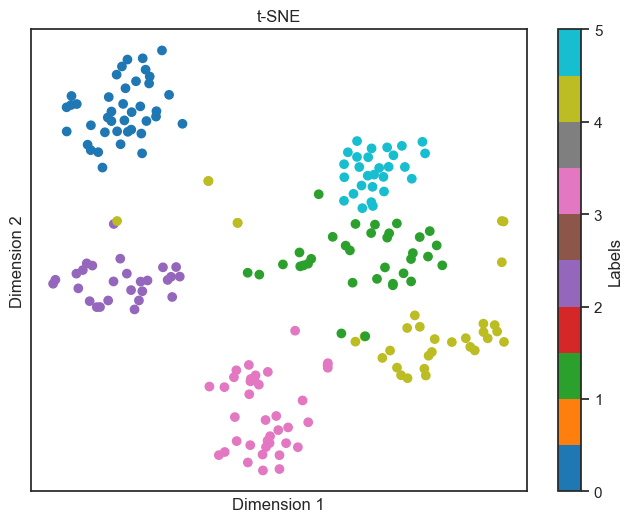

In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(sp.mds_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=sp.kmeans_fit_result.labels_, cmap='tab10')
plt.title("t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(scatter, label='Labels')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

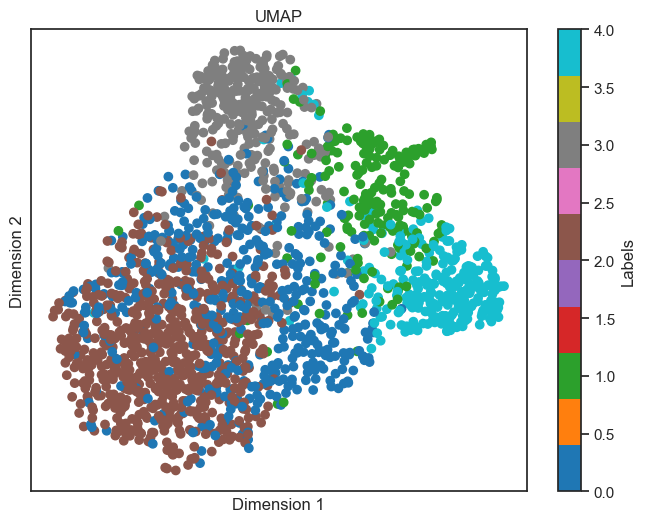

In [32]:
import umap
import matplotlib.pyplot as plt
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
embedded_data = umap_model.fit_transform(sp.mds_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=sp.kmeans_fit_result.labels_,cmap='tab10')
plt.title("UMAP")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(scatter, label='Labels')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
df = sp.compare_gene_to_genes('BRAFhuman')

In [ ]:
x_min = sp.adata.obsm['spatial_real'][:,1].min()
x_max = sp.adata.obsm['spatial_real'][:,1].max()
y_min = sp.adata.obsm['spatial_real'][:,0].min()
y_max = sp.adata.obsm['spatial_real'][:,0].max()
print(x_min, x_max, y_min,y_max)

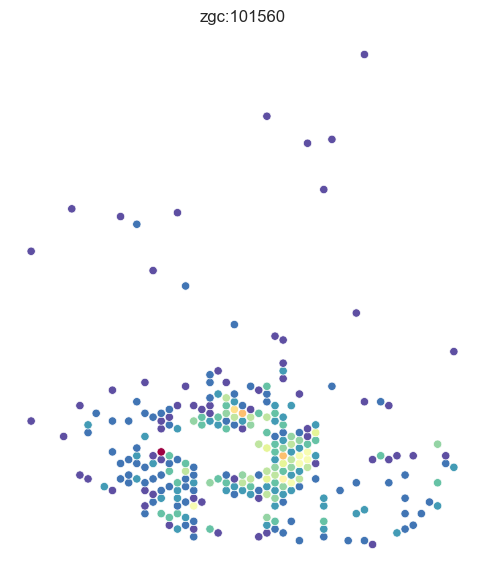

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 7))
sp.plot.plot_gene('zgc:101560', reverse_x=True, rotate=True)

In [ ]:
from STMiner.Algorithm.distance import get_exp_array
from sklearn import mixture
from STMiner.Algorithm.distribution import array_to_list


def get_gmm(matrix, n_comp=10):
    arr = np.array(matrix, dtype=np.int32)
    result = array_to_list(arr)
    gmm = mixture.GaussianMixture(n_components=n_comp, max_iter=200).fit(result)
    return gmm


image = io.imread("E:/data/RegionC/RegionCplaqueHires.png")
cropped_image = cut_image(image)
resized = transform.resize(cropped_image, get_exp_array(adata, adata.var.index[0]).shape)
gaussian = filters.gaussian(resized, 3)
binary = np.where(gaussian > np.percentile(gaussian, 40), 1, 0)
gmm = get_gmm(binary, n_comp=20)

In [ ]:
x_min = sp.adata.obsm['spatial_real'][:,1].min()
x_max = sp.adata.obsm['spatial_real'][:,1].max()
y_min = sp.adata.obsm['spatial_real'][:,0].min()
y_max = sp.adata.obsm['spatial_real'][:,0].max()
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
# 打开图像文件
image = Image.open("E://human/GSM4838132_Visium_B_image.tif/GSM4838132_Visium_B_image.tif")  # 替换为你的图像文件路径

# 使用crop方法进行剪裁
cropped_image = image.crop((x_min, y_min, x_max, y_max))

# 保存剪裁后的图像
cropped_image.save("cropped_image.tif")  # 保存为新的文件，也可以覆盖原始文件

In [ ]:
sp.fit_pattern(n_top_genes=500, n_comp=50, min_cells=200)
sp.build_distance_array()

In [ ]:
sp.cluster_gene(n_clusters=7, mds_components=20)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
index = pd.DataFrame([db,si,ch], index=['1/db','si','ch']).T
index_1 = (index-index.min()) / (index.max() - index.min())
sns.lineplot(index_1, markers=True)
plt.xticks(list(range(2, 12, 1)))
plt.xlabel("Number of Clusters")
plt.ylabel("Normalized Score")
plt.title("Evaluate Clustering Performance")
plt.show()

In [48]:
sp.genes_distance_array.loc['frzb'].mean()

1.1517645762038002

In [51]:
df = pd.DataFrame(sp.genes_distance_array.mean(axis=1), columns=['mean'])
df = df.sort_values(by='mean', ascending=False)

<Axes: ylabel='Count'>

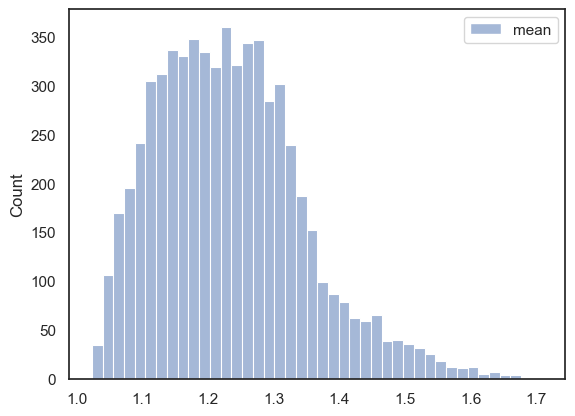

In [53]:
import seaborn as sns
sns.histplot(df)

In [55]:
sp.genes_distance_array.loc['pax3a'].mean()

1.1811807488805446

<Axes: >

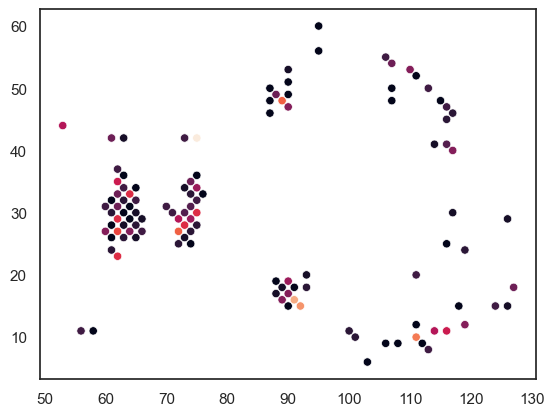

In [33]:
from STMiner.Algorithm.distance import get_exp_array
from scipy.sparse import csr_matrix
import seaborn as sns

arr = get_exp_array(sp.adata, 'myl10')
arr = np.maximum(arr - np.mean(arr[arr != 0]), 0)
sparse_matrix = csr_matrix(arr)
sns.scatterplot(x=sparse_matrix.nonzero()[1],
                y=sparse_matrix.nonzero()[0],
                c=sparse_matrix.data
                )


In [68]:
np.mean(arr)

0.15869140625